# 绘制其在银道面坐标下的分布

## 绘制侧向分布

In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import numpy as np
from astropy import units as u
import pandas as pd

# 遍历数据，直接转换为银道坐标 l 和 b
l_list = []
b_list = []


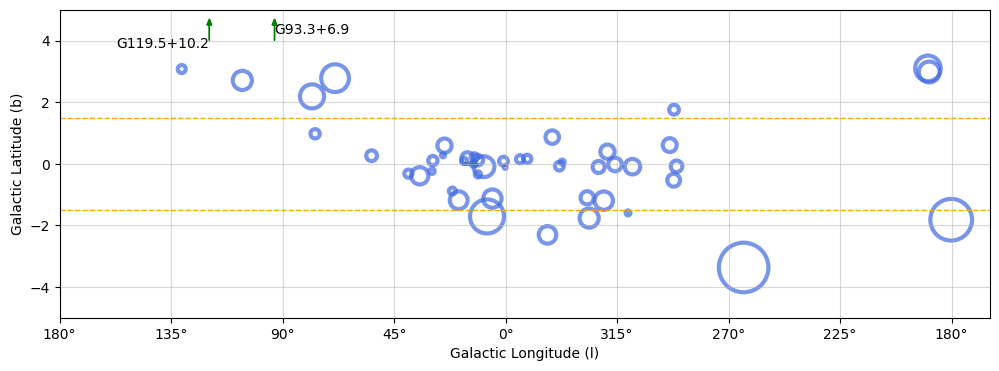

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
# 调大字体
plt.rcParams.update({'font.size': 10})

# 读取 CSV 文件
df = pd.read_csv("../cat/three-cat.csv")

# 初始化用于存储经度和纬度的列表
l_list = []
b_list = []
names = []  # 存储源名

# 遍历 DataFrame 以转换 RA 和 Dec 到银河坐标系
for index, row in df.iterrows():
    # 将 RA 和 Dec 解析为 SkyCoord 对象
    c = SkyCoord(row["J2000_ra (hh:mm:ss)"], 
                 row["J2000_dec (dd:mm:ss)"], 
                 frame="icrs", unit=(u.hourangle, u.deg))
    # 转换为银河坐标
    l_list.append(c.galactic.l.value if c.galactic.l.value < 180 else c.galactic.l.value - 360)
    b_list.append(c.galactic.b.value)
    names.append(row["name"])

# 创建图形
plt.figure(figsize=(12, 4))
ax = plt.subplot(111)

# 根据角尺寸设置散点的大小
sizes = df['size_coarse (arcmin)'].apply(lambda x: float(x) if x != '?' else 0)  # 处理问号值

# 筛选出纬度在 [-10, 10] 之间的点
mask = (-10 <= np.array(b_list)) & (np.array(b_list) <= 10)

ax.axhline(-1.5, color='orange', linestyle='--', linewidth=1)
ax.axhline(1.5, color='orange', linestyle='--', linewidth=1)

# 绘制符合条件的点
ax.scatter(np.array(l_list)[mask], np.array(b_list)[mask], 
           s=sizes[mask] * 5, alpha=0.7, facecolors='none', edgecolors='royalblue', linewidth=3)

i_t = 0
# 对于纬度大于 10 度的点，添加箭头和名称
for i, b in enumerate(b_list):
    if b > 5:  # 纬度大于 5 的点
        if i_t == 0:
            ax.arrow(l_list[i], 4, 0, 0.5, head_width=2, head_length=0.2, fc='green', ec='green')
            ax.annotate(names[i], (l_list[i], 4), textcoords="offset points", xytext=(0, 5), ha='left', color='black')
        else:
            ax.arrow(l_list[i], 4, 0, 0.5, head_width=2, head_length=0.2, fc='green', ec='green')
            ax.annotate(names[i], (l_list[i], 4), textcoords="offset points", xytext=(0, -5), ha='right', color='black')

        i_t = 1 - i_t

# # 将0°经度设置到中心
# ax.set_xlim(-180, 180)

# 设置图形的网格
ax.grid(True, alpha=0.5)

# 设置图形标题和轴标签
plt.xlabel("Galactic Longitude (l)")
plt.ylabel("Galactic Latitude (b)")

# 设置纬度范围
plt.ylim(-5, 5)

# X轴反过来

ax.invert_xaxis()
# # 添加经度标签（将原始的 0-360 经度变为 -180 到 180 经度）
ax.set_xticks(np.arange(180, -181, -45))
ax.set_xticklabels(["180°", "135°", "90°", "45°", "0°", "315°", "270°", "225°", "180°"])
# 显示图形


plt.savefig("../figures/galactic_distribution_l.png", dpi=300)
plt.show()


## 绘制横向分布

借用脚本，脚本需要提供数据坐标数据文件，共5列数据。

 银经 银纬 距离 距离上限 距离下限

 309.800  -2.600  2.5    0.5  -0.5

 284.300  -1.800  3.5    0.5  -0.5

 因此，我们需要整理表格到要求的格式。



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

# 读取数据
df = pd.read_csv("../cat/composite_merged.csv")

# 初始化存储列表
l_list, b_list, dist_list, dist_err_list = [], [], [], []

# 遍历数据并转换坐标
for _, row in df.iterrows():
    c = SkyCoord(row["J2000_ra (hh:mm:ss)"], 
                 row["J2000_dec (dd:mm:ss)"], 
                 frame="icrs", unit=(u.hourangle, u.deg))

    l_list.append(c.galactic.l.deg)
    b_list.append(c.galactic.b.deg)

    # 计算距离及误差
    dist = (row['distance_min (kpc)'] + row['distance_max (kpc)']) / 2
    dist_err = (row['distance_max (kpc)'] - row['distance_min (kpc)']) / 2

    dist_list.append(dist)
    dist_err_list.append(dist_err)

# 将数据转换为 NumPy 数组
data = np.array([l_list, b_list, dist_list, dist_err_list, -np.array(dist_err_list)]).T

print(data)

np.savetxt("../data/coords_snr.txt", data, fmt="%.2f", delimiter="   ")

[[ 1.66687846e-01 -1.24001843e-01             nan             nan
              nan]
 [ 8.69145805e-01  8.37503682e-02  9.17000000e+00  8.30000000e-01
  -8.30000000e-01]
 [ 5.34836263e+00 -1.13279866e+00  4.54500000e+00  6.55000000e-01
  -6.55000000e-01]
 [ 7.50696555e+00 -1.71147568e+00  1.85000000e+00  1.50000000e-01
  -1.50000000e-01]
 [ 8.74420578e+00 -9.62874700e-02  4.60000000e+00  1.40000000e+00
  -1.40000000e+00]
 [ 1.11839766e+01  1.12436964e-01             nan             nan
              nan]
 [ 1.11816164e+01 -3.46764888e-01  4.20000000e+00  5.00000000e-01
  -5.00000000e-01]
 [ 1.25882694e+01  2.22250476e-01             nan             nan
              nan]
 [ 1.28338988e+01 -1.86007577e-02             nan             nan
              nan]
 [ 1.54187239e+01  1.78614462e-01  7.30000000e+00  2.50000000e+00
  -2.50000000e+00]
 [ 1.67339271e+01  8.86955233e-02  1.40000000e+01  1.00000000e-01
  -1.00000000e-01]
 [ 1.89522692e+01 -1.18488734e+00  3.15000000e+00  1.55000000e+00

We have 52 sources.
Saved ../figures/dist.png


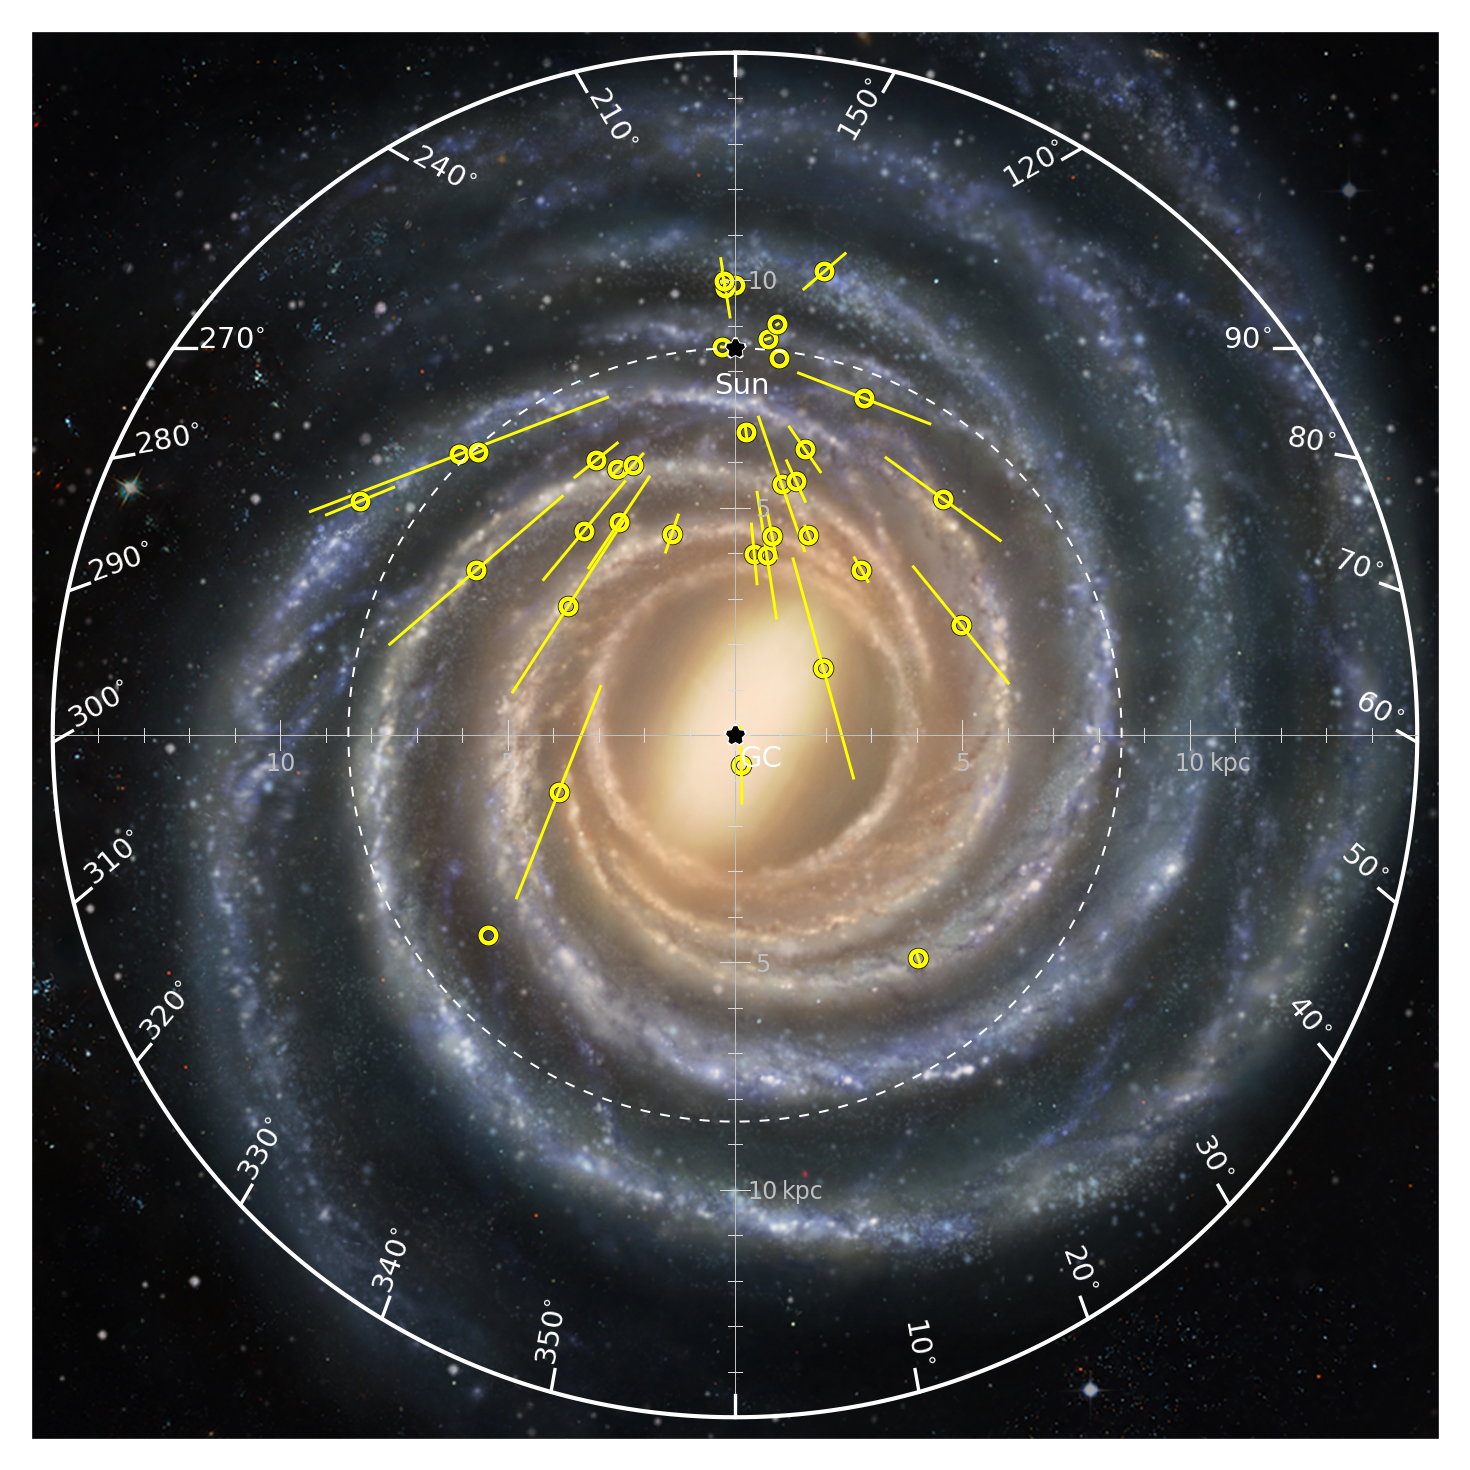

In [5]:
import sys
sys.path.append("../utils")
import distribution

file_coords = "../data/coords_snr.txt"
output = "../figures/dist.png"
distribution.plot_dist(file_coords, output)


# 计算银河系中的分布情况

In [9]:
import pandas as pd
import math

# 读取 CSV 文件
file_path = "../cat/three-cat.csv"  # 替换为你的 CSV 文件路径
df = pd.read_csv(file_path)

# 假设表格中有名为 'l' 的列，表示银河经度
# 例如：df['l'] 可能包含从 0 到 360 的值

# 根据银河经度划分到不同象限
def get_quadrant(l):
    if 0 <= l < 90:
        return 'I'
    elif 90 <= l < 180:
        return 'II'
    elif 180 <= l < 270:
        return 'III'
    elif 270 <= l < 360:
        return 'IV'
    else:
        return 'Unknown'

# 创建一个新列 'quadrant'，存储每个源所属的象限
df['quadrant'] = df['l'].apply(get_quadrant)

# 计算每个象限的 SNR 数量
snr_counts = df['quadrant'].value_counts()

# 银河系盘面面积（假设半径为 12.5 kpc）
R = 12.5  # kpc
area_galaxy_disk = math.pi * R**2

# 假设 SNR 数量分布在整个银河盘内，所以表面密度是每个象限的 SNR 数量除以盘面面积
# 计算每个象限的表面密度
quadrant_surface_density = {}

# 根据每个象限的数量计算表面密度
for quadrant, count in snr_counts.items():
    if quadrant in ['I', 'II', 'III', 'IV']:
        # 假设每个象限的面积相等（虽然实际上可能有所不同，但为了简化）
        quadrant_area = area_galaxy_disk / 4  # 四个象限，平均分
        surface_density = count / quadrant_area
        quadrant_surface_density[quadrant] = surface_density
print(quadrant_surface_density)
# 输出每个象限的 SNR 表面密度
for quadrant, density in quadrant_surface_density.items():
    print(f"象限 {quadrant} 的 SNR 表面密度：{density:.3f} SNRs/kpc²")

# 如果你需要可以将结果保存到一个新表格
# 将 SNR 数量和表面密度保存到新的 DataFrame
# df_quadrant_density = pd.DataFrame(list(quadrant_surface_density.items()), columns=['Quadrant', 'Surface Density (SNRs/kpc²)'])

# 保存到 CSV 文件
# df_quadrant_density.to_csv('quadrant_snr_surface_density.csv', index=False)

def get_latitude_range(b):
    if np.abs(b) < 1:
        return 'I'
    elif 1<=np.abs(b) < 2.5:
        return 'II'
    else:
        return 'Unknown'

# 创建一个新列 'latitude_range'，存储每个源所属的纬度区间
df['latitude_range'] = df['b'].apply(get_latitude_range)

# 计算每个纬度区间的 SNR 数量
snr_latitude_counts = df['latitude_range'].value_counts()
# 计算占比
snr_latitude_counts = snr_latitude_counts / snr_latitude_counts.sum()
# 打印
print(snr_latitude_counts)

{'I': 0.16297466172610084, 'IV': 0.14667719555349074, 'II': 0.032594932345220165, 'III': 0.024446199258915124}
象限 I 的 SNR 表面密度：0.163 SNRs/kpc²
象限 IV 的 SNR 表面密度：0.147 SNRs/kpc²
象限 II 的 SNR 表面密度：0.033 SNRs/kpc²
象限 III 的 SNR 表面密度：0.024 SNRs/kpc²
latitude_range
I          0.530612
II         0.244898
Unknown    0.224490
Name: count, dtype: float64
